# Importing libraries

In [18]:
# pip install pytrends
import pandas as pd
import numpy as np
from plotly.offline import iplot
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
from pytrends.request import TrendReq
pytrends = TrendReq(hl="en-US", tz=360)

In [19]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from math import sqrt

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

# creating stationarity function

In [20]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
        
    def ADF_Stationarity_Test(self, timeseries, printResults = True):

        #Dickey-Fuller test:
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])

            #Add Critical Values
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value

            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)
            


# getting data from google trends

# doing analysis on data of 2020

In [21]:
list1=["Airpods","Apple Tv","Ipad", "Iphone","Apple Watch"]
pytrends2=TrendReq()
pytrends2.build_payload(list1,geo='US',timeframe="2020-01-01 2020-11-16")
data1=pytrends2.interest_over_time()
data1.head()

,Airpods,Apple Tv,Ipad,Iphone,Apple Watch,isPartial
date,,,,,,
2020-01-05,9,3,12,59,9,False
2020-01-12,9,3,11,56,8,False
2020-01-19,8,3,12,57,8,False
2020-01-26,7,3,11,51,7,False
2020-02-02,7,2,10,51,7,False


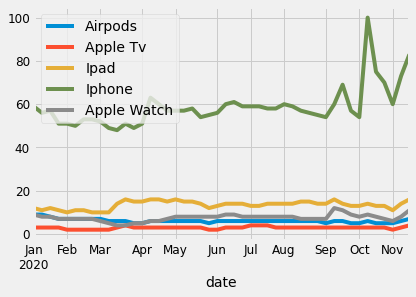

In [24]:
data1.plot()

# Analying stationarity for iphone

In [25]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(data1.Iphone, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic      -0.568463
P-Value                  0.877950
# Lags Used              3.000000
# Observations Used     42.000000
Critical Value (1%)     -3.596636
Critical Value (5%)     -2.933297
Critical Value (10%)    -2.604991
dtype: float64
Is the time series stationary? False


# since it is statiionary we are predicting with moving average

In [26]:
# MA example
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
model = ARMA(data1.Iphone, order=(0, 1))
model_fit = model.fit(disp=False)

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Iphone   No. Observations:                   46
Model:                     ARMA(0, 1)   Log Likelihood                -162.514
Method:                       css-mle   S.D. of innovations              8.262
Date:                Wed, 18 Nov 2020   AIC                            331.027
Time:                        16:25:40   BIC                            336.513
Sample:                    01-05-2020   HQIC                           333.082
                         - 11-15-2020                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.9375      1.740     33.869      0.000      55.527      62.348
ma.L1.Iphone     0.4377      0.123      3.557      0.000       0.197       0.679
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.2844           +0.0000j            2.2844            0.5000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'RSS: 3140.2591')

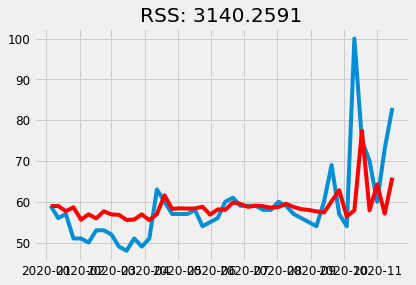

In [28]:
plt.plot(data1.Iphone)
plt.plot(model_fit.fittedvalues, color='red')
plt.title('RSS: %.4f'% np.nansum((model_fit.fittedvalues-data1.Iphone)**2))

Test MSE: 62.891


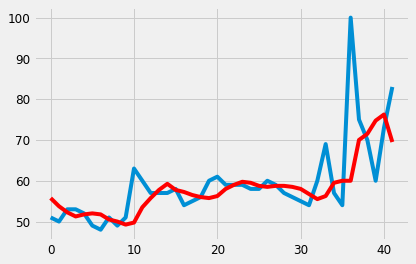

In [29]:
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = data1.Iphone
# prepare situation
X = series.values
window = 4
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# doing analysis on data since 2008

In [30]:
list1=["Airpods","Apple Tv","Ipad", "Iphone","Apple Watch"]
pytrends1=TrendReq()
pytrends1.build_payload(list1,geo='US',timeframe="2008-01-01 2020-11-16")
data=pytrends1.interest_over_time()
data.head()

,Airpods,Apple Tv,Ipad,Iphone,Apple Watch,isPartial
date,,,,,,
2008-01-01,0,1,0,15,0,False
2008-02-01,0,1,0,13,0,False
2008-03-01,0,0,0,14,0,False
2008-04-01,0,0,0,12,0,False
2008-05-01,0,0,0,14,0,False


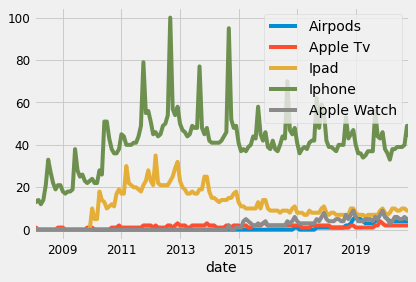

In [31]:

data.plot()

# Analying stationarity for iphone

In [32]:
data.index = pd.to_datetime(data.index)

In [33]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(data.Iphone, printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic       -2.484228
P-Value                   0.119359
# Lags Used              12.000000
# Observations Used     142.000000
Critical Value (1%)      -3.477262
Critical Value (5%)      -2.882118
Critical Value (10%)     -2.577743
dtype: float64
Is the time series stationary? False


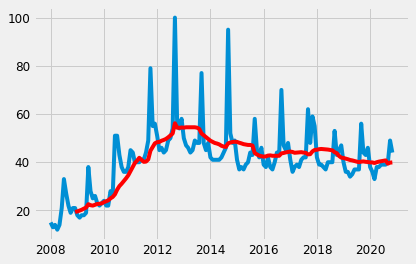

In [36]:
moving_avg = data.Iphone.rolling(window=12).mean()
plt.plot(data.Iphone)
plt.plot(moving_avg, color='red')


# using automarima 

In [37]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data.Iphone, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=997.681, Time=0.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1077.939, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1017.738, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=998.369, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1027.827, Time=0.05 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=999.274, Time=0.30 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=999.613, Time=0.53 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=998.227, Time=0.15 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=1000.124, Time=0.84 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1019.089, Time=0.10 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=999.467, Time=0.29 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=999.567, Time=0.32 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=1044.627, Time=0.08 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=998.013, Time=0.18 sec
 ARIMA(2,1,0)(0,1,1)[12]   


res = sm.tsa.ARMA(data.Iphone, (3, 0)).fit()
fig, ax = plt.subplots()
ax = data.Iphone.loc['2010':].plot(ax=ax)
fig = res.plot_predict('2017', '2025', dynamic=True, ax=ax,plot_insample=False)
plt.show()

# ploting and predicting with arima 

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  153
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -562.434
Method:                       css-mle   S.D. of innovations              9.543
Date:                Wed, 18 Nov 2020   AIC                           1130.868
Time:                        16:26:52   BIC                           1139.959
Sample:                             1   HQIC                          1134.561
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1915      0.335      0.571      0.568      -0.466       0.849
ma.L1.D.y     -0.5693      0.117     -4.869      0.000      -0.798      -0.340
                                    Roots           

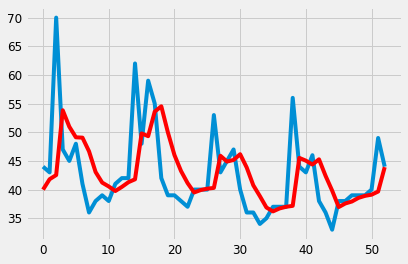

In [38]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series =data.Iphone
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
print(model_fit.summary())
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

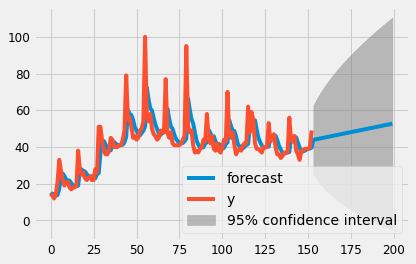

In [39]:
model_fit.plot_predict(1,200)
plt.show()